Chapter 31
# 二元二次型
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sympy import symbols, diff, lambdify, expand, simplify

## 二元函数

In [2]:
def fcn_n_grdnt(A, xx1, xx2):

    x1,x2 = symbols('x1 x2')
    # 符号向量
    x = np.array([[x1,x2]]).T
    # 二次型
    f_x = x.T@A@x
    f_x = f_x[0][0]
    print(simplify(expand(f_x)))

    # 计算梯度，符号
    grad_f = [diff(f_x,var) for var in (x1,x2)]
    
    # 计算二元函数值 f(x1, x2)
    f_x_fcn = lambdify([x1,x2],f_x)
    ff_x = f_x_fcn(xx1,xx2)

    # 梯度函数
    grad_fcn = lambdify([x1,x2],grad_f)
    
    # 采样，降低颗粒度
    xx1_ = xx1[::20,::20]
    xx2_ = xx2[::20,::20]
    
    # 计算梯度
    V = grad_fcn(xx1_,xx2_)
    
    # 修复梯度值
    if isinstance(V[1], int):
        V[1] = np.zeros_like(xx1_)

    if isinstance(V[0], int):
        V[0] = np.zeros_like(xx1_)
    
    return ff_x, V

In [15]:
# 可视化函数
def visualize(xx1,xx2,f2_array,gradient_array):
    fig = plt.figure(figsize=(6,3))
    # 第一幅子图
    ax = fig.add_subplot(1, 3, 1, projection='3d')

    ax.plot_wireframe(xx1, xx2, f2_array, 
                      rstride=10, cstride=10,
                      color = [0.8,0.8,0.8],
                      linewidth = 0.25)

    ax.contour(xx1, xx2, f2_array, 
               levels = 12,
               cmap = 'RdYlBu_r')

    ax.set_xlabel('$x_1$'); ax.set_ylabel('$x_2$')
    ax.set_zlabel('$f(x_1,x_2)$')
    ax.set_proj_type('ortho')
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_zticks([])
    ax.view_init(azim=-120, elev=30); ax.grid(False)
    ax.set_xlim(xx1.min(), xx1.max()); ax.set_ylim(xx2.min(), xx2.max())
    
    # 第二幅子图
    ax = fig.add_subplot(1, 3, 2)
    ax.contour(xx1, xx2, f2_array, 
               levels = 12,
               cmap = 'RdYlBu_r')

    ax.set_xlabel('$x_1$'); ax.set_ylabel('$x_2$')
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_aspect('equal'); ax.grid(False)
    ax.set_xlim(xx1.min(), xx1.max()); ax.set_ylim(xx2.min(), xx2.max())
    
    # 第三幅子图
    ax = fig.add_subplot(1, 3, 3)

    ax.contourf(xx1, xx2, f2_array, 
               levels = 12,
               cmap = 'RdYlBu_r')

    xx1_ = xx1[::20,::20]; xx2_ = xx2[::20,::20]
    ax.quiver(xx1_, xx2_, gradient_array[0], gradient_array[1],
               angles='xy', scale_units='xy',
               edgecolor='none', alpha=0.8)

    ax.set_xlabel('$x_1$'); ax.set_ylabel('$x_2$')
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_aspect('equal')
    ax.grid(False)
    ax.set_xlim(xx1.min(), xx1.max()); 
    ax.set_ylim(xx2.min(), xx2.max())

## 生成网格化数据

In [4]:
x1_array = np.linspace(-2,2,201)
x2_array = np.linspace(-2,2,201)

xx1, xx2 = np.meshgrid(x1_array, x2_array)

## 正定性

x1**2 + x2**2


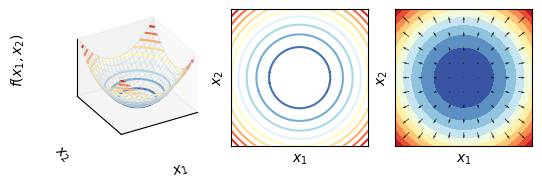

In [16]:
A = np.array([[1, 0],
              [0, 1]])

f2_array, gradient_array = fcn_n_grdnt(A, xx1, xx2)
visualize(xx1,xx2,f2_array,gradient_array)

In [6]:
type(gradient_array)

list

In [7]:
type(gradient_array[0])

numpy.ndarray

In [8]:
gradient_array[0].ndim

2

## 半正定

x1**2


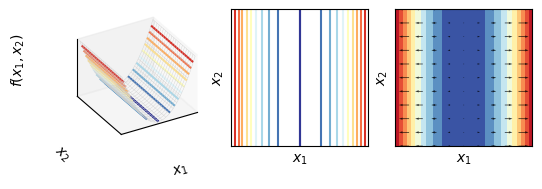

In [9]:
A = np.array([[1, 0],
              [0, 0]])

f2_array, gradient_array = fcn_n_grdnt(A, xx1, xx2)
visualize(xx1,xx2,f2_array,gradient_array) 

## 负定

-x1**2 - x2**2


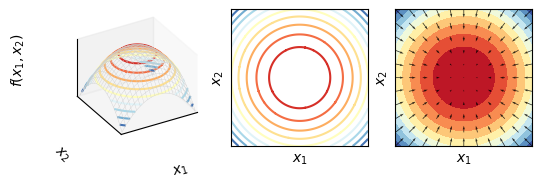

In [10]:
A = np.array([[-1, 0],
              [0, -1]])

f2_array, gradient_array = fcn_n_grdnt(A, xx1, xx2)
visualize(xx1,xx2,f2_array,gradient_array)

## 半负定

-x1**2


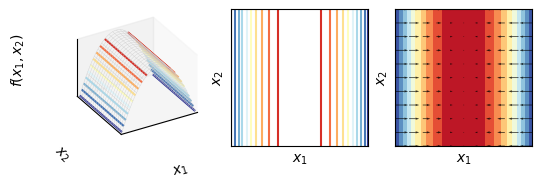

In [11]:
A = np.array([[-1, 0],
              [0,  0]])

f2_array, gradient_array = fcn_n_grdnt(A, xx1, xx2)
visualize(xx1,xx2,f2_array,gradient_array)

## 不定

2*x1*x2


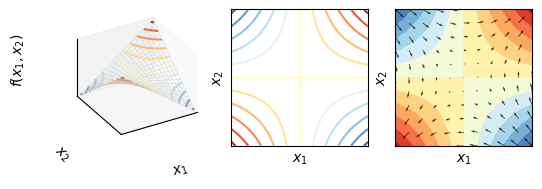

In [12]:
A = np.array([[0, 1],
              [1, 0]])

f2_array, gradient_array = fcn_n_grdnt(A, xx1, xx2)
visualize(xx1,xx2,f2_array,gradient_array)

False